## LIST 7 Dataset (exclude rdd2022 D40)
1. Annotated Potholes Image Dataset (XML)
    - train 665
    - test 0
    - val 0
2. Multi-Weather Pothole Detection (MWPD) (txt yolo) (semua sudah di augmentasi walau hanya rotate itu saja yang bisa saya lihat)
    - train 2730
    - test 97
    - val 260
3. Pothole Detection (XML)
    - train 665
    - test 665
    - val 0
4. Pothole.v1-raw.yolov8 (txt yolo)
    - train 465
    - test 67
    - val 133
5. Potholes or Cracks on Road Image Dataset  (XML) (need hashing to rm duplicate)
    - train 404
    - test 0
    - val 0
6. potholes, cracks and openmanholes (Road Hazards) (txt)
    - train 2237
    - test 21
    - val 481
7. Road Pothole Images Dataset (JSON)
    - train 7733
    - test 789
    - val 0

- Ternyata dataset nomor 1, 3, & 4 sama persis hanya beda sumber dan beda penamaan file namun dataset nomor 4 lebih sedikit jadi tidak sama persis jumlahnya namun gambarnya sama

# Hapus file dataset duplikat dengan cek hash

In [2]:
import os
import hashlib
from collections import defaultdict

# Ganti dengan path-folder aslimu
dataset_paths = [
    r"Annotated Potholes Image Dataset",
    r"Multi-Weather Pothole Detection (MWPD)",
    r"Pothole Detection",
    r"Pothole.v1-raw.yolov8",
    r"Potholes or Cracks on Road Image Dataset",
    r"potholes, cracks and openmanholes (Road Hazards)",
    r"Road Pothole Images Dataset"
]


In [3]:

# Fungsi untuk menghitung hash SHA256
def hash_file(filepath):
    sha = hashlib.sha256()
    with open(filepath, 'rb') as f:
        while chunk := f.read(8192):
            sha.update(chunk)
    return sha.hexdigest()

# Simpan hasil hash dan lokasi filenya
hash_dict = defaultdict(list)

# Lakukan hashing semua file dari semua dataset
image_extensions = {'.jpg', '.jpeg', '.png'}
for dataset in dataset_paths:
    for root, _, files in os.walk(dataset):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            if ext in image_extensions:
                path = os.path.join(root, file)
                try:
                    file_hash = hash_file(path)
                    hash_dict[file_hash].append(path)
                except Exception as e:
                    print(f"Error hashing {path}: {e}")

# Tampilkan duplikat (hash dengan lebih dari satu path)
print("\n== Duplikat Ditemukan ==")
duplicate_count = 0
for h, paths in hash_dict.items():
    if len(paths) > 1:
        duplicate_count += 1
        print(f"\nHash: {h}")
        for p in paths:
            print(f" - {p}")

print(f"\nTotal hash unik: {len(hash_dict)}")
print(f"Total duplikat hash: {duplicate_count}")


== Duplikat Ditemukan ==

Hash: cf7038981864142a0d2fce14e07f6ff6a3a6e13a7815c82921bf2b6e529bbabb
 - Annotated Potholes Image Dataset\train\images\img-10.jpg
 - Pothole.v1-raw.yolov8\train\images\img-10_jpg.rf.eaceaaa6f119cf6eb49edc1bc92efaa2.jpg

Hash: 51bf028115a9a7a8ed57e91f43a422e0d6b9a1cf1033d512e26fccd13d058b42
 - Annotated Potholes Image Dataset\train\images\img-108.jpg
 - Pothole.v1-raw.yolov8\train\images\img-108_jpg.rf.a35e86abc558a98f252bfc10e49fd6d9.jpg

Hash: f0528872662cd5d48fcf6b3f1a8f26bf51ed682b443613b4f53b00f333d6f415
 - Annotated Potholes Image Dataset\train\images\img-112.jpg
 - Pothole.v1-raw.yolov8\valid\images\img-112_jpg.rf.f2165fc7173878a7c1ad397c7ed595d9.jpg

Hash: 08fbcc9e0f5dc6d3be03e8ea2360ee198beb3cc4dca1b27dc6e0377e9fa16da0
 - Annotated Potholes Image Dataset\train\images\img-116.jpg
 - Pothole.v1-raw.yolov8\valid\images\img-116_jpg.rf.09abd4f4dd5161e4a14cdd87d23b2cab.jpg

Hash: 7bb7f50d6a1b017573c9cd5a628f23563251faf44de4f2b5d58f1ed971f2fe6e
 - Annotated

In [4]:
import os
import hashlib
from collections import defaultdict

dataset_paths = [
    r"Annotated Potholes Image Dataset",
    r"Multi-Weather Pothole Detection (MWPD)",
    r"Pothole Detection",
    r"Pothole.v1-raw.yolov8",
    r"Potholes or Cracks on Road Image Dataset",
    r"potholes, cracks and openmanholes (Road Hazards)",
    r"Road Pothole Images Dataset"
]

def hash_file(filepath):
    sha = hashlib.sha256()
    with open(filepath, 'rb') as f:
        while chunk := f.read(8192):
            sha.update(chunk)
    return sha.hexdigest()

hash_dict = defaultdict(list)
image_extensions = {'.jpg', '.jpeg', '.png'}

for dataset in dataset_paths:
    for root, _, files in os.walk(dataset):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            if ext in image_extensions:
                path = os.path.join(root, file)
                try:
                    file_hash = hash_file(path)
                    hash_dict[file_hash].append(path)
                except Exception as e:
                    print(f"Error hashing {path}: {e}")

# Hapus duplikat, simpan hanya satu file per hash
deleted_count = 0
for h, paths in hash_dict.items():
    if len(paths) > 1:
        # Keep the first file, delete the rest
        for dup_path in paths[1:]:
            try:
                os.remove(dup_path)
                deleted_count += 1
                print(f"Deleted: {dup_path}")
            except Exception as e:
                print(f"Failed to delete {dup_path}: {e}")

print(f"\n✅ Selesai. Total file duplikat yang dihapus: {deleted_count}")

Deleted: Pothole.v1-raw.yolov8\train\images\img-10_jpg.rf.eaceaaa6f119cf6eb49edc1bc92efaa2.jpg
Deleted: Pothole.v1-raw.yolov8\train\images\img-108_jpg.rf.a35e86abc558a98f252bfc10e49fd6d9.jpg
Deleted: Pothole.v1-raw.yolov8\valid\images\img-112_jpg.rf.f2165fc7173878a7c1ad397c7ed595d9.jpg
Deleted: Pothole.v1-raw.yolov8\valid\images\img-116_jpg.rf.09abd4f4dd5161e4a14cdd87d23b2cab.jpg
Deleted: Pothole.v1-raw.yolov8\valid\images\img-118_jpg.rf.75b7bf6e55f6d7b25f190d74200033c8.jpg
Deleted: Pothole.v1-raw.yolov8\train\images\img-119_jpg.rf.5df904c99a0e765190d9421a4bf04bc6.jpg
Deleted: Pothole.v1-raw.yolov8\train\images\img-129_jpg.rf.fbd5c4841019062274b4e9d1daeab4c3.jpg
Deleted: Pothole.v1-raw.yolov8\train\images\img-13_jpg.rf.a4db51428d0461f9ed82e12eb6d87a03.jpg
Deleted: Pothole.v1-raw.yolov8\train\images\img-134_jpg.rf.833f57b2c592a23189208dcb656eaaa2.jpg
Deleted: Pothole.v1-raw.yolov8\train\images\img-155_jpg.rf.7c1dd28f3db86d175cca8437cece1d08.jpg
Deleted: Pothole.v1-raw.yolov8\train\image

## Hapus anotasi yang yatim ALIAS tidak punya pasangan gambar

In [5]:
import os

image_exts = {'.jpg', '.jpeg', '.png'}
annotation_exts = {'.xml', '.txt', '.json'}

for dataset_path in dataset_paths:
    for split in ['train', 'val', 'test']:
        img_dir = os.path.join(dataset_path, split, 'images')
        ann_dir = os.path.join(dataset_path, split, 'annotation')

        if not os.path.exists(ann_dir):
            continue

        img_basenames = {os.path.splitext(f)[0] for f in os.listdir(img_dir) if os.path.splitext(f)[1].lower() in image_exts}

        for f in os.listdir(ann_dir):
            base, ext = os.path.splitext(f)
            if ext.lower() in annotation_exts and base not in img_basenames:
                os.remove(os.path.join(ann_dir, f))
                print(f"Deleted orphan annotation: {os.path.join(ann_dir, f)}")


In [7]:
import os
import shutil

root_folder = r"D:\7DATASET"  # Ganti sesuai direktori utama
dataset_names = [
    "Annotated Potholes Image Dataset",
    "Multi-Weather Pothole Detection (MWPD)",
    "Pothole Detection",
    "Pothole.v1-raw.yolov8",
    "Potholes or Cracks on Road Image Dataset",
    "potholes, cracks and openmanholes (Road Hazards)",
    "Road Pothole Images Dataset"
]


In [9]:
import os
import re

# Path ke folder root dataset
root_folder = r"D:\7DATASET"

# Mapping nama folder ke prefix baru
prefix_map = {
    "Annotated Potholes Image Dataset": "APID",
    "Multi-Weather Pothole Detection (MWPD)": "MWPD",
    "Pothole Detection": "PD",
    "Pothole.v1-raw.yolov8": "PTHLv1",
    "Potholes or Cracks on Road Image Dataset": "PoCoRID",
    "potholes, cracks and openmanholes (Road Hazards)": "PCaO_RH",
    "Road Pothole Images Dataset": "RPID"
}

# Ekstensi yang akan diproses
valid_exts = {'.jpg', '.jpeg', '.png', '.xml', '.txt', '.json'}

# Rename berdasarkan mapping prefix
for dataset_name, new_prefix in prefix_map.items():
    dataset_path = os.path.join(root_folder, dataset_name)
    for split in ["train", "val", "test"]:
        split_path = os.path.join(dataset_path, split)
        if not os.path.exists(split_path):
            continue

        for subfolder in os.listdir(split_path):
            full_path = os.path.join(split_path, subfolder)
            if not os.path.isdir(full_path):
                continue

            for fname in os.listdir(full_path):
                name, ext = os.path.splitext(fname)
                if ext.lower() not in valid_exts:
                    continue

                # Cari format seperti: OLDPREFIX_split_filename.ext
                match = re.match(r"^[A-Z0-9]+_(train|val|test)_(.+)", fname)
                if match:
                    split_from_name = match.group(1)
                    real_name = match.group(2)
                    new_name = f"{new_prefix}_{split_from_name}_{real_name}"
                    os.rename(os.path.join(full_path, fname), os.path.join(full_path, new_name))

print("✅ Semua nama file berhasil diperbarui dengan prefix baru.")


✅ Semua nama file berhasil diperbarui dengan prefix baru.


In [10]:
import os
from pathlib import Path

# Folder root
root_folder = r"D:\7DATASET"

# Dataset yang ingin dibersihkan dan distandarkan
target_datasets = {
    "Multi-Weather Pothole Detection (MWPD)": "MWPD",
    "Pothole Detection": "PD",
    "Pothole.v1-raw.yolov8": "PTHLv1"
}

# Ekstensi
image_exts = {'.jpg', '.jpeg', '.png'}
anno_exts = {'.xml', '.txt'}

for dataset_name, prefix in target_datasets.items():
    for split in ['train', 'val', 'test']:
        image_dir = Path(root_folder) / dataset_name / split / 'images'
        anno_dir = Path(root_folder) / dataset_name / split / 'annotations'

        if not image_dir.exists() or not anno_dir.exists():
            continue

        image_files = sorted([f for f in image_dir.iterdir() if f.suffix.lower() in image_exts])
        counter = 1

        for img_path in image_files:
            old_name = img_path.stem
            new_id = f"{prefix}_{split}_{counter:06d}"
            new_img_path = img_path.with_name(new_id + img_path.suffix)

            # Cari pasangan anotasi
            found_anno = False
            for ext in anno_exts:
                old_anno_path = anno_dir / f"{old_name}{ext}"
                if old_anno_path.exists():
                    new_anno_path = anno_dir / f"{new_id}{ext}"
                    os.rename(old_anno_path, new_anno_path)
                    found_anno = True
                    break

            os.rename(img_path, new_img_path)
            counter += 1

        print(f"✅ {prefix} - {split}: {counter - 1} file berhasil dinormalisasi.")

✅ PD - train: 665 file berhasil dinormalisasi.


In [14]:
import os
from pathlib import Path

# Dataset + prefix
datasets = {
    "Multi-Weather Pothole Detection (MWPD)": "MWPD",
    "Pothole Detection": "PD",
    "Pothole.v1-raw.yolov8": "PTHLv1",
    "Potholes or Cracks on Road Image Dataset": "PoCoRID",
}

root_folder = r"D:\7DATASET"

image_exts = {'.jpg', '.jpeg', '.png'}
anno_exts = {'.xml', '.txt'}

for dataset_name, prefix in datasets.items():
    for split in ['train', 'val', 'test']:
        img_dir = Path(root_folder) / dataset_name / split / 'images'
        anno_dir = Path(root_folder) / dataset_name / split / 'annotations'

        if not img_dir.exists() or not anno_dir.exists():
            continue

        images = sorted([f for f in img_dir.iterdir() if f.suffix.lower() in image_exts])
        counter = 1
        renamed = 0
        orphan_img = 0
        orphan_anno = 0

        for img_file in images:
            img_stem = img_file.stem
            paired = False

            for ext in anno_exts:
                anno_file = anno_dir / (img_stem + ext)
                if anno_file.exists():
                    new_id = f"{prefix}_{split}_{counter:06d}"
                    new_img_path = img_file.with_name(new_id + img_file.suffix)
                    new_anno_path = anno_file.with_name(new_id + ext)
                    os.rename(img_file, new_img_path)
                    os.rename(anno_file, new_anno_path)
                    counter += 1
                    renamed += 1
                    paired = True
                    break

            if not paired:
                img_file.unlink()
                orphan_img += 1

        # Hapus orphan anotasi
        annos = [f for f in anno_dir.iterdir() if f.suffix.lower() in anno_exts]
        for anno_file in annos:
            stem = anno_file.stem
            match = any((img_dir / (stem + ext)).exists() for ext in image_exts)
            if not match:
                anno_file.unlink()
                orphan_anno += 1

        print(f"✅ {prefix} - {split}:")
        print(f"   Renamed pairs: {renamed}")
        print(f"   Deleted orphan images: {orphan_img}")
        print(f"   Deleted orphan annotations: {orphan_anno}")
        print()

✅ PD - train:
   Renamed pairs: 665
   Deleted orphan images: 0
   Deleted orphan annotations: 0

✅ PoCoRID - train:
   Renamed pairs: 112
   Deleted orphan images: 12
   Deleted orphan annotations: 83



In [16]:
import os
from pathlib import Path

# Daftar dataset + prefix sesuai yang kamu mau
datasets = {
    "Annotated Potholes Image Dataset": "APID",
    "Multi-Weather Pothole Detection (MWPD)": "MWPD",
    "Pothole Detection": "PD",
    "Pothole.v1-raw.yolov8": "PTHLv1",
    "Potholes or Cracks on Road Image Dataset": "PoCoRID",
    "potholes, cracks and openmanholes (Road Hazards)": "PCaORH",
    "Road Pothole Images Dataset": "RPID"
}

root_folder = Path(r"D:\7DATASET")

image_exts = {'.jpg', '.jpeg', '.png'}
anno_exts = {'.xml', '.txt'}

for dataset_name, prefix in datasets.items():
    print(f"Processing dataset: {dataset_name} with prefix: {prefix}")
    dataset_path = root_folder / dataset_name

    for split in ['train', 'val', 'test']:
        img_dir = dataset_path / split / 'images'
        anno_dir = dataset_path / split / 'annotations'

        if not img_dir.exists() or not anno_dir.exists():
            # Kalau ada split tapi foldernya gak lengkap, skip
            continue

        # Ambil list gambar, urutkan biar consistent numbering
        images = sorted([f for f in img_dir.iterdir() if f.suffix.lower() in image_exts])
        
        counter = 1

        for img_file in images:
            img_stem = img_file.stem
            # Cari file anotasi yang matching (bisa .xml atau .txt)
            matched_anno = None
            for ext in anno_exts:
                possible_anno = anno_dir / (img_stem + ext)
                if possible_anno.exists():
                    matched_anno = possible_anno
                    break
            
            if matched_anno is None:
                # Jika anotasi gak ada, hapus gambar orphan
                print(f"Orphan image deleted: {img_file.name}")
                img_file.unlink()
                continue

            # Nama baru dengan nomor 7 digit, contoh: PoCoRID_train_0000001.jpg
            new_base = f"{prefix}_{split}_{counter:07d}"
            new_img_path = img_dir / (new_base + img_file.suffix.lower())
            new_anno_path = anno_dir / (new_base + matched_anno.suffix.lower())

            # Rename file
            img_file.rename(new_img_path)
            matched_anno.rename(new_anno_path)

            counter += 1
        
        # Hapus orphan anotasi yang gak punya gambar matching
        annos = [f for f in anno_dir.iterdir() if f.suffix.lower() in anno_exts]
        for anno_file in annos:
            stem = anno_file.stem
            img_exists = any((img_dir / (stem + ext)).exists() for ext in image_exts)
            if not img_exists:
                print(f"Orphan annotation deleted: {anno_file.name}")
                anno_file.unlink()

print("✅ Semua file sudah berhasil di-rename dan orphan dihapus.")

Processing dataset: Annotated Potholes Image Dataset with prefix: APID
Processing dataset: Multi-Weather Pothole Detection (MWPD) with prefix: MWPD
Processing dataset: Pothole Detection with prefix: PD
Processing dataset: Pothole.v1-raw.yolov8 with prefix: PTHLv1
Processing dataset: Potholes or Cracks on Road Image Dataset with prefix: PoCoRID
Processing dataset: potholes, cracks and openmanholes (Road Hazards) with prefix: PCaORH
Processing dataset: Road Pothole Images Dataset with prefix: RPID
Orphan image deleted: RPID_train_negative_G0015965.JPG
Orphan image deleted: RPID_train_negative_G0016071.JPG
Orphan image deleted: RPID_train_negative_G0016087.JPG
Orphan image deleted: RPID_train_negative_G0016093.JPG
Orphan image deleted: RPID_train_negative_G0016094.JPG
Orphan image deleted: RPID_train_negative_G0016095.JPG
Orphan image deleted: RPID_train_negative_G0016108.JPG
Orphan image deleted: RPID_train_negative_G0016109.JPG
Orphan image deleted: RPID_train_negative_G0016139.JPG
Orph

In [17]:
import os
from pathlib import Path

root_folder = Path(r"D:\7DATASET")

datasets = [
    "Annotated Potholes Image Dataset",
    "Multi-Weather Pothole Detection (MWPD)",
    "Pothole Detection",
    "Pothole.v1-raw.yolov8",
    "Potholes or Cracks on Road Image Dataset",
    "potholes, cracks and openmanholes (Road Hazards)",
    "Road Pothole Images Dataset"
]

for dataset_name in datasets:
    dataset_path = root_folder / dataset_name
    for split in ['train', 'val', 'test']:
        for folder_name in ['images', 'annotations']:
            folder_path = dataset_path / split / folder_name
            if not folder_path.exists():
                continue

            for file in folder_path.iterdir():
                if ".rf." in file.name:
                    print(f"Deleting {file}")
                    file.unlink()

print("✅ Selesai menghapus file dengan '.rf.' di nama.")


Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_101_jpg.rf.53fab5a14aa64e331f961a80374db113.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_101_jpg.rf.5fa80c95b70d3d0f580e269c7d2c3e1b.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_101_jpg.rf.9f2628c6e8463a19bf5aa26b7faefbc9.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_101_jpg.rf.ad3cfbf41bd4cd2d15bf683be6d9cc5b.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_101_jpg.rf.db491c070dc69feaf6f364fa8a532fb1.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_101_jpg.rf.f4ce148ac2596e43f9ca59ab6a16beee.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWPD_train_102_jpg.rf.02248cf2a5438c3beb591789827fc648.jpg
Deleting D:\7DATASET\Multi-Weather Pothole Detection (MWPD)\train\images\MWP

In [20]:
import os

root_folder = r"D:\7DATASET"  # sesuaikan dengan path root kamu

dataset_rename_map = {
    "Pothole.v1-raw.yolov8": "PTHLv1",
    "Multi-Weather Pothole Detection (MWPD)": "MWPD"
}

image_exts = {'.jpg', '.jpeg', '.png'}
anno_exts = {'.xml', '.txt'}

for dataset in dataset_rename_map:
    dataset_path = os.path.join(root_folder, dataset)
    short_name = dataset_rename_map[dataset]
    
    for split in ["train", "val", "test"]:
        split_path = os.path.join(dataset_path, split)
        if not os.path.exists(split_path):
            continue
        
        # Path folder images dan annotations (cek mana ada)
        images_folder = os.path.join(split_path, "images")
        annotations_folder = os.path.join(split_path, "annotations")
        if not os.path.exists(annotations_folder):
            annotations_folder = os.path.join(split_path, "labels")
        
        if not os.path.exists(images_folder):
            print(f"Folder images tidak ditemukan di {split_path}, lanjut ke split berikutnya.")
            continue
        if not os.path.exists(annotations_folder):
            print(f"Folder annotations/labels tidak ditemukan di {split_path}, lanjut ke split berikutnya.")
            continue
        
        images = sorted([f for f in os.listdir(images_folder) if os.path.splitext(f)[1].lower() in image_exts])
        annos = sorted([f for f in os.listdir(annotations_folder) if os.path.splitext(f)[1].lower() in anno_exts])
        
        if len(images) != len(annos):
            print(f"WARNING: jumlah gambar dan anotasi beda di {dataset} {split}: {len(images)} != {len(annos)}")
        
        # Rename images
        for i, img_file in enumerate(images, 1):
            ext = os.path.splitext(img_file)[1].lower()
            new_name = f"{short_name}_{split}_{i:06d}{ext}"
            old_path = os.path.join(images_folder, img_file)
            new_path = os.path.join(images_folder, new_name)
            os.rename(old_path, new_path)
        
        # Rename annotations
        for i, anno_file in enumerate(annos, 1):
            ext = os.path.splitext(anno_file)[1].lower()
            new_name = f"{short_name}_{split}_{i:06d}{ext}"
            old_path = os.path.join(annotations_folder, anno_file)
            new_path = os.path.join(annotations_folder, new_name)
            os.rename(old_path, new_path)

print("✅ Rename selesai untuk PTHLv1 dan MWPD.")

✅ Rename selesai untuk PTHLv1 dan MWPD.


In [23]:
import os
import shutil
from collections import defaultdict

root_folder = r"D:\7DATASET"
target_root = r"D:\7dataset\7mixed"  # folder baru untuk gabungan

dataset_shortnames = {
    "Annotated Potholes Image Dataset": "APID",
    "Multi-Weather Pothole Detection (MWPD)": "MWPD",
    "Pothole Detection": "PD",
    "Pothole.v1-raw.yolov8": "PTHLv1",
    "Potholes or Cracks on Road Image Dataset": "PoCoRID",
    "potholes, cracks and openmanholes (Road Hazards)": "PCaORH",
    "Road Pothole Images Dataset": "RPID"
}

image_exts = {'.jpg', '.jpeg', '.png'}
anno_exts = {'.xml', '.txt'}

# Buat struktur folder 7dataset jika belum ada
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(target_root, split, "images"), exist_ok=True)
    os.makedirs(os.path.join(target_root, split, "annotations"), exist_ok=True)

# Copy file dari tiap dataset ke folder gabungan
for dataset_name, shortname in dataset_shortnames.items():
    dataset_path = os.path.join(root_folder, dataset_name)
    
    for split in ["train", "val", "test"]:
        split_path = os.path.join(dataset_path, split)
        if not os.path.exists(split_path):
            continue
        
        # Cek folder images dan annotations/labels
        images_folder = os.path.join(split_path, "images")
        annotations_folder = os.path.join(split_path, "annotations")
        if not os.path.exists(annotations_folder):
            annotations_folder = os.path.join(split_path, "labels")
        
        if not os.path.exists(images_folder) or not os.path.exists(annotations_folder):
            print(f"Skip {dataset_name} {split} karena folder images/annotations tidak lengkap")
            continue
        
        # Copy images
        for f in os.listdir(images_folder):
            ext = os.path.splitext(f)[1].lower()
            if ext in image_exts:
                src = os.path.join(images_folder, f)
                dst = os.path.join(target_root, split, "images", f)
                shutil.copy2(src, dst)
        
        # Copy annotations
        for f in os.listdir(annotations_folder):
            ext = os.path.splitext(f)[1].lower()
            if ext in anno_exts:
                src = os.path.join(annotations_folder, f)
                dst = os.path.join(target_root, split, "annotations", f)
                shutil.copy2(src, dst)

print("✅ Copy selesai, sekarang print persebaran per dataset...")

# Hitung persebaran file per dataset dari prefix nama file
count_stats = defaultdict(lambda: {"images": 0, "annotations": 0})

for split in ["train", "val", "test"]:
    images_path = os.path.join(target_root, split, "images")
    annos_path = os.path.join(target_root, split, "annotations")
    
    for f in os.listdir(images_path):
        prefix = f.split('_')[0]
        count_stats[prefix]["images"] += 1
    
    for f in os.listdir(annos_path):
        prefix = f.split('_')[0]
        count_stats[prefix]["annotations"] += 1

print(f"Persebaran file di folder {target_root}:")

for prefix, counts in count_stats.items():
    print(f"{prefix}: {counts['images']} images, {counts['annotations']} annotations")

Skip potholes, cracks and openmanholes (Road Hazards) test karena folder images/annotations tidak lengkap
✅ Copy selesai, sekarang print persebaran per dataset...
Persebaran file di folder D:\7dataset\7mixed:
APID: 665 images, 665 annotations
MWPD: 2827 images, 2827 annotations
PCaO: 1888 images, 2236 annotations
PD: 665 images, 665 annotations
PoCoRID: 112 images, 112 annotations
PTHLv1: 532 images, 532 annotations
1001: 3 images, 4 annotations
1002: 2 images, 4 annotations
1003: 2 images, 4 annotations
1004: 2 images, 4 annotations
1005: 2 images, 4 annotations
1006: 2 images, 4 annotations
1007: 2 images, 4 annotations
1008: 3 images, 4 annotations
1009: 2 images, 4 annotations
100: 4 images, 4 annotations
1010: 2 images, 4 annotations
1011: 2 images, 4 annotations
1012: 2 images, 4 annotations
1013: 3 images, 4 annotations
1014: 2 images, 4 annotations
1015: 3 images, 4 annotations
1016: 2 images, 4 annotations
1017: 4 images, 4 annotations
1018: 2 images, 4 annotations
1019: 4 ima

In [24]:
import os
import shutil
import random

# Set folder input dan output
dataset_dir = r"D:\7dataset\7mixed"
output_dir = r"D:\7dataset\7mixed-prepared"

# Buat folder output jika belum ada
os.makedirs(os.path.join(output_dir, "train", "images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "train", "annotations"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "images"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "val", "annotations"), exist_ok=True)
os.makedirs(os.path.join(output_dir, "test", "images"), exist_ok=True)

# List semua file gambar dan anotasi dari dataset gabungan
all_images = []
all_annotations = []

# Anggap ekstensi gambar umum: .jpg, .jpeg, .png
image_exts = {".jpg", ".jpeg", ".png"}

# Kumpulkan gambar dari folder 'train' dan 'val' (jika ada)
for root, dirs, files in os.walk(dataset_dir):
    # Skip folder test/annotations karena kamu bilang ga perlu anotasi test
    if "test" in root and "annotations" in root:
        continue
    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_exts:
            all_images.append(os.path.join(root, file))
        elif ext == ".txt" or ext == ".xml" or ext == ".json":  # format anotasi kemungkinan
            all_annotations.append(os.path.join(root, file))

# Buat dictionary untuk mapping gambar ke anotasi (berdasarkan nama file tanpa ekstensi)
# Misal: img_001.jpg -> img_001.txt/xml/json
def get_basename(path):
    return os.path.splitext(os.path.basename(path))[0]

annotations_map = {}
for ann in all_annotations:
    base = get_basename(ann)
    annotations_map.setdefault(base, []).append(ann)

# Filter semua gambar yang punya anotasi (optional, bisa juga tetap semua)
images_with_ann = [img for img in all_images if get_basename(img) in annotations_map]

print(f"Total images found: {len(all_images)}")
print(f"Images with annotations: {len(images_with_ann)}")

# Split 80:20 train-val
random.seed(42)
random.shuffle(images_with_ann)

split_idx = int(len(images_with_ann) * 0.8)
train_imgs = images_with_ann[:split_idx]
val_imgs = images_with_ann[split_idx:]

def copy_files(file_list, subset):
    for img_path in file_list:
        base = get_basename(img_path)

        # Copy image
        dst_img_path = os.path.join(output_dir, subset, "images", os.path.basename(img_path))
        shutil.copy2(img_path, dst_img_path)

        # Copy all annotations yang ada untuk gambar ini
        anns = annotations_map.get(base, [])
        for ann_path in anns:
            dst_ann_path = os.path.join(output_dir, subset, "annotations", os.path.basename(ann_path))
            shutil.copy2(ann_path, dst_ann_path)

# Copy train dan val
print("Copying train images and annotations...")
copy_files(train_imgs, "train")

print("Copying val images and annotations...")
copy_files(val_imgs, "val")

# Copy semua gambar dari folder test ke output test/images (tanpa anotasi)
test_images_dir = os.path.join(dataset_dir, "test", "images")
if os.path.exists(test_images_dir):
    test_imgs = [f for f in os.listdir(test_images_dir) if os.path.splitext(f)[1].lower() in image_exts]
    for f in test_imgs:
        src = os.path.join(test_images_dir, f)
        dst = os.path.join(output_dir, "test", "images", f)
        shutil.copy2(src, dst)
    print(f"Copied {len(test_imgs)} test images without annotations.")
else:
    print("Folder test/images tidak ditemukan, skip copy test images.")

print("Dataset preparation selesai.")

Total images found: 7100
Images with annotations: 6936
Copying train images and annotations...
Copying val images and annotations...
Copied 164 test images without annotations.
Dataset preparation selesai.


In [3]:
import os

def count_files(folder):
    if not os.path.exists(folder):
        return 0
    return len([f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))])

def get_counts(base_dir):
    counts = {}
    for subset in ["train", "val", "test"]:
        images_folder = os.path.join(base_dir, subset, "images")
        annotations_folder = os.path.join(base_dir, subset, "annotations")
        img_count = count_files(images_folder)
        ann_count = count_files(annotations_folder) if subset != "test" else 0
        counts[subset] = (img_count, ann_count)
    return counts

def print_counts(name, counts):
    print(f"{name}")
    total_img = total_ann = 0
    for subset, (img, ann) in counts.items():
        print(f"  {subset.upper()}:")
        print(f"    Images: {img}")
        if subset != "test":
            print(f"    Annotations: {ann}")
        total_img += img
        total_ann += ann
    print(f"  TOTAL:")
    print(f"    Images: {total_img}")
    print(f"    Annotations: {total_ann}")
    print()
    return total_img, total_ann

# Paths
mixed7_path = r"7mixed-prepared"
rdd_path = r"dataset-mix"

# Get counts
mixed7_counts = get_counts(mixed7_path)
rdd_counts = get_counts(rdd_path)

# Print individual counts
total_img_mixed7, total_ann_mixed7 = print_counts("7mixed-prepared", mixed7_counts)
total_img_rdd, total_ann_rdd = print_counts("RDD2022_MIX", rdd_counts)

# Print total combined
print("TOTAL COMBINED")
print(f"  Images: {total_img_mixed7 + total_img_rdd}")
print(f"  Annotations: {total_ann_mixed7 + total_ann_rdd}")

7MIXED_PREPARED
  TRAIN:
    Images: 5548
    Annotations: 5548
  VAL:
    Images: 1388
    Annotations: 1388
  TEST:
    Images: 164
  TOTAL:
    Images: 7100
    Annotations: 6936

RDD2022_MIX
  TRAIN:
    Images: 2951
    Annotations: 2951
  VAL:
    Images: 723
    Annotations: 723
  TEST:
    Images: 9035
  TOTAL:
    Images: 12709
    Annotations: 3674

TOTAL COMBINED
  Images: 19809
  Annotations: 10610


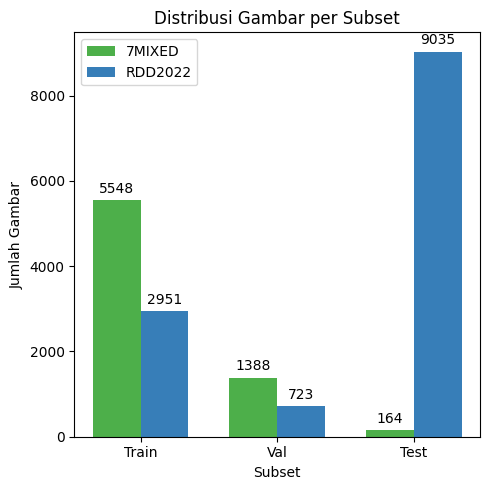

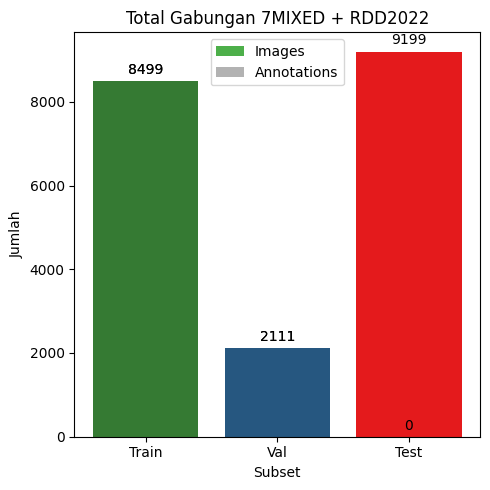

In [26]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk hitung jumlah file gambar dan anotasi dalam subset
def count_dataset_files(base_path):
    subsets = ['train', 'val', 'test']
    img_counts = []
    ann_counts = []

    for subset in subsets:
        img_dir = os.path.join(base_path, subset, 'images')
        ann_dir = os.path.join(base_path, subset, 'annotations')

        # Hitung file gambar
        if os.path.exists(img_dir):
            img_count = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        else:
            img_count = 0

        # Hitung file anotasi
        if os.path.exists(ann_dir):
            ann_count = len([f for f in os.listdir(ann_dir) if f.lower().endswith(('.txt', '.xml', '.json'))])
        else:
            ann_count = 0

        img_counts.append(img_count)
        ann_counts.append(ann_count)

    return img_counts, ann_counts

# Path dataset
path_7mixed = r'7mixed-prepared'
path_rdd = r'dataset-mix'

# Ambil data
img_7mixed, ann_7mixed = count_dataset_files(path_7mixed)
img_rdd, ann_rdd = count_dataset_files(path_rdd)

# Label dan warna
subsets = ['Train', 'Val', 'Test']
colors = ['#4daf4a', '#377eb8', '#e41a1c']

# --- Plot 1: Per Dataset
x = np.arange(len(subsets))
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))
bar1 = ax.bar(x - width/2, img_7mixed, width, label='7MIXED', color='#4daf4a')
bar2 = ax.bar(x + width/2, img_rdd, width, label='RDD2022', color='#377eb8')

ax.set_xlabel('Subset')
ax.set_ylabel('Jumlah Gambar')
ax.set_title('Distribusi Gambar per Subset')
ax.set_xticks(x)
ax.set_xticklabels(subsets)
ax.legend()
ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

plt.tight_layout()
plt.show()

# --- Plot 2: Gabungan Total
total_imgs = np.array(img_7mixed) + np.array(img_rdd)
total_anns = np.array(ann_7mixed) + np.array(ann_rdd)

fig, ax = plt.subplots(figsize=(5, 5))
bars_img = ax.bar(subsets, total_imgs, color=colors, label='Images')
bars_ann = ax.bar(subsets, total_anns, color='black', alpha=0.3, label='Annotations')

ax.set_xlabel('Subset')
ax.set_ylabel('Jumlah')
ax.set_title('Total Gabungan 7MIXED + RDD2022')
ax.legend()
ax.bar_label(bars_img, padding=3)
ax.bar_label(bars_ann, padding=3)

plt.tight_layout()
plt.show()

# Cek tipe annotations

In [30]:
import os
from collections import defaultdict

def check_annotation_types(base_dir):
    annotation_types = defaultdict(int)
    for root, _, files in os.walk(base_dir):
        for file in files:
            ext = os.path.splitext(file)[1].lower()
            annotation_types[ext] += 1
    return annotation_types

# Ganti path sesuai lokasi
annotations_path = r"7mixed-prepared"
annotation_stats = check_annotation_types(annotations_path)

print("Annotation file type distribution:")
for ext, count in annotation_stats.items():
    print(f"{ext or 'no extension'}: {count} file(s)")

Annotation file type distribution:
.jpg: 6435 file(s)
.txt: 5494 file(s)
.xml: 1442 file(s)
.png: 665 file(s)


# Cek class list

In [35]:
from glob import glob

txt_files = glob("7mixed-prepared/*.txt")
class_ids = set()

for path in txt_files:
    with open(path) as f:
        for line in f:
            parts = line.strip().split()
            if parts:
                class_ids.add(int(parts[0]))

print("Class IDs ditemukan:", sorted(class_ids))


Class IDs ditemukan: []


# Convert non Pascal ke Pascal

In [50]:
import os
import xml.etree.ElementTree as ET
from PIL import Image
import shutil
import xml.dom.minidom

class_list = ["D40"]

# Daftar kombinasi path split (train, val)
splits = [
    {
        "annotations": r"7mixed-prepared/train/annotations",
        "images": r"7mixed-prepared/train/images"
    },
    {
        "annotations": r"7mixed-prepared/val/annotations",
        "images": r"7mixed-prepared/val/images"
    }
]

output_annotations_path = r"7mixed-prepared/annotations_pascal"
os.makedirs(output_annotations_path, exist_ok=True)

def yolo_to_pascal(yolo_path, img_path, output_xml_path, classes):
    with open(yolo_path, "r") as f:
        lines = f.read().strip().splitlines()

    img = Image.open(img_path)
    img_w, img_h = img.size

    annotation = ET.Element("annotation")
    ET.SubElement(annotation, "folder").text = os.path.basename(os.path.dirname(img_path))
    ET.SubElement(annotation, "filename").text = os.path.basename(img_path)
    ET.SubElement(annotation, "path").text = os.path.abspath(img_path)

    source = ET.SubElement(annotation, "source")
    ET.SubElement(source, "database").text = "Unknown"

    size = ET.SubElement(annotation, "size")
    ET.SubElement(size, "width").text = str(img_w)
    ET.SubElement(size, "height").text = str(img_h)
    ET.SubElement(size, "depth").text = "3"

    ET.SubElement(annotation, "segmented").text = "0"

    for line in lines:
        if not line.strip():
            continue
        parts = line.strip().split()
        if len(parts) != 5:
            print(f"Warning: Invalid YOLO format in {yolo_path}: {line}")
            continue
        class_id, x_center, y_center, w, h = parts
        class_id = int(class_id)
        if class_id >= len(classes):
            print(f"Warning: class_id {class_id} out of range in {yolo_path}")
            continue
        cls_name = classes[class_id]

        x_center, y_center, w, h = map(float, (x_center, y_center, w, h))
        xmin = int((x_center - w / 2) * img_w)
        ymin = int((y_center - h / 2) * img_h)
        xmax = int((x_center + w / 2) * img_w)
        ymax = int((y_center + h / 2) * img_h)

        obj = ET.SubElement(annotation, "object")
        ET.SubElement(obj, "name").text = cls_name
        ET.SubElement(obj, "pose").text = "Unspecified"
        ET.SubElement(obj, "truncated").text = "0"
        ET.SubElement(obj, "difficult").text = "0"

        bndbox = ET.SubElement(obj, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(max(0, xmin))
        ET.SubElement(bndbox, "ymin").text = str(max(0, ymin))
        ET.SubElement(bndbox, "xmax").text = str(min(img_w, xmax))
        ET.SubElement(bndbox, "ymax").text = str(min(img_h, ymax))

    # Pretty print XML using minidom
    xml_str = ET.tostring(annotation, encoding='utf-8')
    parsed = xml.dom.minidom.parseString(xml_str)
    pretty_xml_as_str = parsed.toprettyxml(indent="  ")

    with open(output_xml_path, "w", encoding="utf-8") as f:
        f.write(pretty_xml_as_str)


def main():
    for split in splits:
        annotations_path = split["annotations"]
        images_path = split["images"]

        # Ini folder anotasi asal (train/annotations atau val/annotations)
        output_split_ann_path = annotations_path

        for fname in os.listdir(annotations_path):
            fpath = os.path.join(annotations_path, fname)
            base_name, ext = os.path.splitext(fname)
            img_file_jpg = os.path.join(images_path, base_name + ".jpg")
            img_file_png = os.path.join(images_path, base_name + ".png")
            img_file = None
            if os.path.exists(img_file_jpg):
                img_file = img_file_jpg
            elif os.path.exists(img_file_png):
                img_file = img_file_png
            else:
                print(f"Warning: Image for {fname} not found")
                continue

            output_xml_file = os.path.join(output_annotations_path, base_name + ".xml")

            if ext.lower() == ".txt":
                yolo_to_pascal(fpath, img_file, output_xml_file, class_list)
                print(f"Converted YOLO {fname} -> {base_name}.xml")
            elif ext.lower() == ".xml":
                shutil.copy(fpath, output_xml_file)
                print(f"Copied Pascal VOC XML {fname}")
            else:
                print(f"Skipping unsupported annotation file: {fname}")

            # Pindahkan file XML hasil convert ke folder anotasi split yang sesuai
            dest_xml_path = os.path.join(output_split_ann_path, base_name + ".xml")
            shutil.move(output_xml_file, dest_xml_path)


if __name__ == "__main__":
    main()

Converted YOLO 100_aug_brightness_contrast.txt -> 100_aug_brightness_contrast.xml
Converted YOLO 100_aug_flip.txt -> 100_aug_flip.xml
Converted YOLO 100_aug_rotate.txt -> 100_aug_rotate.xml
Converted YOLO 100_aug_vertical_flip.txt -> 100_aug_vertical_flip.xml
Converted YOLO 102_aug_brightness_contrast.txt -> 102_aug_brightness_contrast.xml
Converted YOLO 102_aug_flip.txt -> 102_aug_flip.xml
Converted YOLO 102_aug_rotate.txt -> 102_aug_rotate.xml
Converted YOLO 102_aug_vertical_flip.txt -> 102_aug_vertical_flip.xml
Converted YOLO 104_aug_flip.txt -> 104_aug_flip.xml
Converted YOLO 104_aug_rotate.txt -> 104_aug_rotate.xml
Converted YOLO 104_aug_vertical_flip.txt -> 104_aug_vertical_flip.xml
Converted YOLO 105_aug_brightness_contrast.txt -> 105_aug_brightness_contrast.xml
Converted YOLO 105_aug_flip.txt -> 105_aug_flip.xml
Converted YOLO 105_aug_rotate.txt -> 105_aug_rotate.xml
Converted YOLO 106_aug_brightness_contrast.txt -> 106_aug_brightness_contrast.xml
Converted YOLO 106_aug_flip.tx

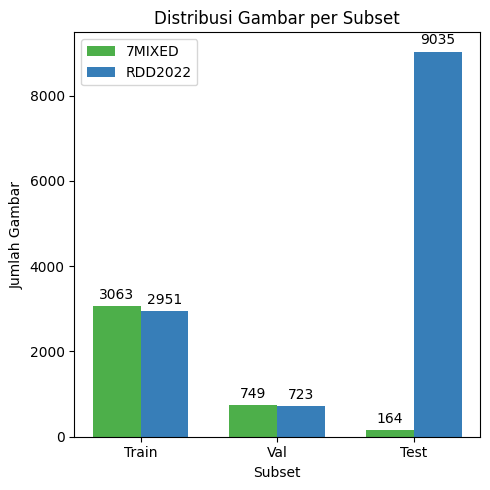

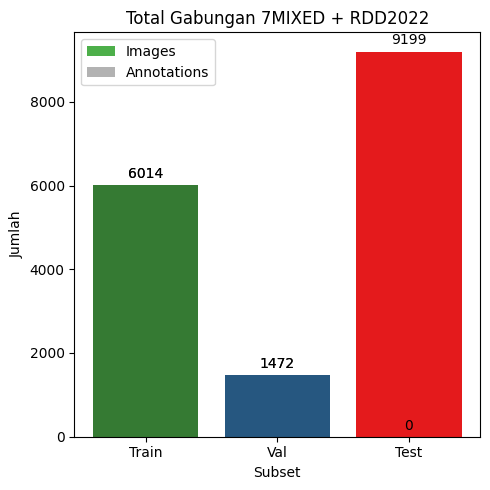

In [47]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk hitung jumlah file gambar dan anotasi dalam subset
def count_dataset_files(base_path):
    subsets = ['train', 'val', 'test']
    img_counts = []
    ann_counts = []

    for subset in subsets:
        img_dir = os.path.join(base_path, subset, 'images')
        ann_dir = os.path.join(base_path, subset, 'annotations')

        # Hitung file gambar
        if os.path.exists(img_dir):
            img_count = len([f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        else:
            img_count = 0

        # Hitung file anotasi
        if os.path.exists(ann_dir):
            ann_count = len([f for f in os.listdir(ann_dir) if f.lower().endswith(('.txt', '.xml', '.json'))])
        else:
            ann_count = 0

        img_counts.append(img_count)
        ann_counts.append(ann_count)

    return img_counts, ann_counts

# Path dataset
path_7mixed = r'7mixed-prepared'
path_rdd = r'dataset-mix'

# Ambil data
img_7mixed, ann_7mixed = count_dataset_files(path_7mixed)
img_rdd, ann_rdd = count_dataset_files(path_rdd)

# Label dan warna
subsets = ['Train', 'Val', 'Test']
colors = ['#4daf4a', '#377eb8', '#e41a1c']

# --- Plot 1: Per Dataset
x = np.arange(len(subsets))
width = 0.35

fig, ax = plt.subplots(figsize=(5, 5))
bar1 = ax.bar(x - width/2, img_7mixed, width, label='7MIXED', color='#4daf4a')
bar2 = ax.bar(x + width/2, img_rdd, width, label='RDD2022', color='#377eb8')

ax.set_xlabel('Subset')
ax.set_ylabel('Jumlah Gambar')
ax.set_title('Distribusi Gambar per Subset')
ax.set_xticks(x)
ax.set_xticklabels(subsets)
ax.legend()
ax.bar_label(bar1, padding=3)
ax.bar_label(bar2, padding=3)

plt.tight_layout()
plt.show()

# --- Plot 2: Gabungan Total
total_imgs = np.array(img_7mixed) + np.array(img_rdd)
total_anns = np.array(ann_7mixed) + np.array(ann_rdd)

fig, ax = plt.subplots(figsize=(5, 5))
bars_img = ax.bar(subsets, total_imgs, color=colors, label='Images')
bars_ann = ax.bar(subsets, total_anns, color='black', alpha=0.3, label='Annotations')

ax.set_xlabel('Subset')
ax.set_ylabel('Jumlah')
ax.set_title('Total Gabungan 7MIXED + RDD2022')
ax.legend()
ax.bar_label(bars_img, padding=3)
ax.bar_label(bars_ann, padding=3)

plt.tight_layout()
plt.show()

In [65]:
import os
import shutil
import re
import xml.etree.ElementTree as ET

old_root = "dataset-mix"
output_root = "dataset-mix-prepared"
splits = ["train", "val", "test"]

for split in splits:
    os.makedirs(os.path.join(output_root, split, "images"), exist_ok=True)
    if split != "test":
        os.makedirs(os.path.join(output_root, split, "annotations"), exist_ok=True)

def extract_country_number(filename):
    base = os.path.splitext(filename)[0]
    m = re.match(r"(.+?)_(\d+)$", base)
    if m:
        return m.group(1), m.group(2)
    else:
        return "unknown", "000000"

def update_xml_content(xml_path, new_filename, new_path):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    # Update <filename>
    fn_tag = root.find('filename')
    if fn_tag is not None:
        fn_tag.text = new_filename
    # Update <path>
    path_tag = root.find('path')
    if path_tag is not None:
        path_tag.text = new_path
    # Save changes (overwrite)
    tree.write(xml_path, encoding='utf-8', xml_declaration=True)

for split in splits:
    old_images_dir = os.path.join(old_root, split, "images")
    old_ann_dir = os.path.join(old_root, split, "annotations") if split != "test" else None

    new_images_dir = os.path.join(output_root, split, "images")
    new_ann_dir = os.path.join(output_root, split, "annotations") if split != "test" else None

    if not os.path.exists(old_images_dir):
        print(f"Warning: Images folder not found for split '{split}': {old_images_dir}")
        continue

    for img_file in os.listdir(old_images_dir):
        if not img_file.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        country, number = extract_country_number(img_file)
        ext = os.path.splitext(img_file)[1]

        new_name = f"RDD2022_{country}_{split}_{number}{ext}"

        old_img_path = os.path.join(old_images_dir, img_file)
        new_img_path = os.path.join(new_images_dir, new_name)

        # Copy and rename gambar
        if os.path.exists(old_img_path):
            shutil.copy(old_img_path, new_img_path)
        else:
            print(f"Warning: Image file not found: {old_img_path}")

        # Jika bukan test, copy dan update anotasi jika ada (.xml atau .txt)
        if split != "test" and old_ann_dir is not None:
            base_name = os.path.splitext(img_file)[0]
            found_ann = False
            for ann_ext in [".xml", ".txt"]:
                old_ann_path = os.path.join(old_ann_dir, base_name + ann_ext)
                if os.path.exists(old_ann_path):
                    new_ann_name = f"RDD2022_{country}_{split}_{number}{ann_ext}"
                    new_ann_path = os.path.join(new_ann_dir, new_ann_name)
                    shutil.copy(old_ann_path, new_ann_path)
                    found_ann = True

                    # Kalau file xml, update isi filename dan path
                    if ann_ext == ".xml":
                        update_xml_content(new_ann_path, new_ann_name, os.path.abspath(new_img_path))

                    break
            if not found_ann:
                print(f"Warning: Annotation file not found for {img_file} in split '{split}'")

print("Proses selesai! Semua file sudah di-copy, rename, dan isi XML di-update.")


Proses selesai! Semua file sudah di-copy, rename, dan isi XML di-update.


In [31]:
from PIL import Image
import os

def get_unique_image_resolutions(base_path):
    image_exts = [".jpg", ".jpeg", ".png", ".bmp"]
    unique_resolutions = set()

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_exts):
                try:
                    img_path = os.path.join(root, file)
                    with Image.open(img_path) as img:
                        unique_resolutions.add(img.size)  # (width, height)
                except Exception as e:
                    print(f"❌ Gagal membaca {file}: {e}")

    return unique_resolutions

# Jalankan pada folder dataset-mix
dataset_path = r"dataset-mix"
resolutions = get_unique_image_resolutions(dataset_path)

print(f"\n📏 Resolusi unik yang ditemukan ({len(resolutions)} total):")
for res in sorted(resolutions):
    print(f"  - {res[0]}x{res[1]}")


📏 Resolusi unik yang ditemukan (10 total):
  - 512x512
  - 540x540
  - 600x600
  - 640x640
  - 720x720
  - 1024x1024
  - 1080x1080
  - 3643x2041
  - 3650x2044
  - 4040x2035


In [32]:
from PIL import Image
import os

def get_unique_image_resolutions(base_path):
    image_exts = [".jpg", ".jpeg", ".png", ".bmp"]
    unique_resolutions = set()

    for root, dirs, files in os.walk(base_path):
        for file in files:
            if any(file.lower().endswith(ext) for ext in image_exts):
                try:
                    img_path = os.path.join(root, file)
                    with Image.open(img_path) as img:
                        unique_resolutions.add(img.size)  # (width, height)
                except Exception as e:
                    print(f"❌ Gagal membaca {file}: {e}")

    return unique_resolutions

# Jalankan pada folder dataset-mix
dataset_path = r"7mixed-prepared"
resolutions = get_unique_image_resolutions(dataset_path)

print(f"\n📏 Resolusi unik yang ditemukan ({len(resolutions)} total):")
for res in sorted(resolutions):
    print(f"  - {res[0]}x{res[1]}")



📏 Resolusi unik yang ditemukan (439 total):
  - 100x69
  - 100x80
  - 100x88
  - 150x150
  - 160x240
  - 183x275
  - 194x259
  - 200x200
  - 203x360
  - 204x170
  - 215x93
  - 225x150
  - 225x159
  - 225x300
  - 239x360
  - 240x360
  - 243x208
  - 243x330
  - 245x206
  - 245x360
  - 259x194
  - 260x260
  - 266x190
  - 270x360
  - 273x184
  - 274x411
  - 275x183
  - 275x184
  - 275x292
  - 279x180
  - 279x327
  - 280x220
  - 286x176
  - 289x175
  - 300x168
  - 300x199
  - 300x200
  - 300x300
  - 300x356
  - 300x357
  - 300x369
  - 300x397
  - 300x399
  - 300x400
  - 300x403
  - 300x440
  - 300x442
  - 300x444
  - 300x450
  - 300x451
  - 300x533
  - 301x167
  - 303x300
  - 303x446
  - 320x240
  - 324x216
  - 330x244
  - 335x300
  - 336x300
  - 339x218
  - 342x240
  - 345x300
  - 350x485
  - 359x240
  - 360x240
  - 360x300
  - 360x360
  - 360x455
  - 362x300
  - 366x300
  - 368x206
  - 370x300
  - 373x300
  - 381x300
  - 382x300
  - 383x300
  - 395x600
  - 395x612
  - 396x300
  - 399x300

# Resize semua gambar > 640x640 dan biarkan yang < 640x640

In [34]:
import os
from PIL import Image, ImageOps

def resize_and_pad_image(img, target_size=640):
    w, h = img.size

    if w > target_size or h > target_size:
        scale = target_size / max(w, h)
        new_w = int(w * scale)
        new_h = int(h * scale)
        img = img.resize((new_w, new_h), Image.LANCZOS)
        w, h = img.size

    pad_w = target_size - w
    pad_h = target_size - h
    padding = (pad_w // 2, pad_h // 2, pad_w - pad_w // 2, pad_h - pad_h // 2)

    img_padded = ImageOps.expand(img, border=padding, fill=(0,0,0))
    return img_padded

def process_folder(input_folder, output_folder, target_size=640):
    os.makedirs(output_folder, exist_ok=True)
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for fname in image_files:
        input_path = os.path.join(input_folder, fname)
        output_path = os.path.join(output_folder, fname)

        with Image.open(input_path) as img:
            img_out = resize_and_pad_image(img, target_size)
            img_out.save(output_path)

        print(f"Processed {fname}")

datasets = [
    "7mixed-prepared",
    "dataset-mix"
]

for base_dir in datasets:
    print(f"Processing dataset: {base_dir}")
    folders = {
        "train": os.path.join(base_dir, "train/images"),
        "val": os.path.join(base_dir, "val/images"),
        "test": os.path.join(base_dir, "test/images")
    }
    output_base = base_dir + "_resized"
    output_folders = {
        "train": os.path.join(output_base, "train/images"),
        "val": os.path.join(output_base, "val/images"),
        "test": os.path.join(output_base, "test/images")
    }

    for split in ["train", "val", "test"]:
        print(f"  Processing {split} set...")
        process_folder(folders[split], output_folders[split], target_size=640)

print("Done all datasets!")

Processing dataset: 7mixed-prepared
  Processing train set...
Processed 1001_aug_brightness_contrast.jpg
Processed 1001_aug_flip.jpg
Processed 1001_aug_rotate.jpg
Processed 1002_aug_brightness_contrast.jpg
Processed 1002_aug_rotate.jpg
Processed 1003_aug_brightness_contrast.jpg
Processed 1003_aug_rotate.jpg
Processed 1004_aug_brightness_contrast.jpg
Processed 1004_aug_rotate.jpg
Processed 1005_aug_brightness_contrast.jpg
Processed 1005_aug_rotate.jpg
Processed 1006_aug_brightness_contrast.jpg
Processed 1006_aug_rotate.jpg
Processed 1007_aug_brightness_contrast.jpg
Processed 1007_aug_rotate.jpg
Processed 1008_aug_brightness_contrast.jpg
Processed 1008_aug_flip.jpg
Processed 1008_aug_rotate.jpg
Processed 1009_aug_brightness_contrast.jpg
Processed 1009_aug_rotate.jpg
Processed 100_aug_brightness_contrast.jpg
Processed 100_aug_flip.jpg
Processed 100_aug_rotate.jpg
Processed 100_aug_vertical_flip.jpg
Processed 1010_aug_brightness_contrast.jpg
Processed 1011_aug_brightness_contrast.jpg
Proce

TypeError: color must be int or single-element tuple